##### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##### Loading Data 

In [3]:
df = pd.read_csv(r'D:\Msc DS\sem-2\PY assigments\A-06/ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
df.shape

(3755, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [8]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Distribution of Salaries

In [10]:
def plot_salary_histogram(df, job_type = None):
    plt.figure(figsize = (10, 5))
    mean_salary = df["salary_in_usd"].mean()
    plt.hist(df["salary_in_usd"])
    plt.axvline(mean_salary, 
                color = 'red', 
                label = f"Mean salary = ${mean_salary:,.0f}"
               )
    
    plt.xlabel("Salary (USD)")
    plt.ylabel("Frequency")
    
    if job_type != None:
        plt.title("Distribution of Salaries in USD for {} Jobs")
        
    plt.title("Distribution of Salaries in USD")
    plt.legend()
    plt.show()

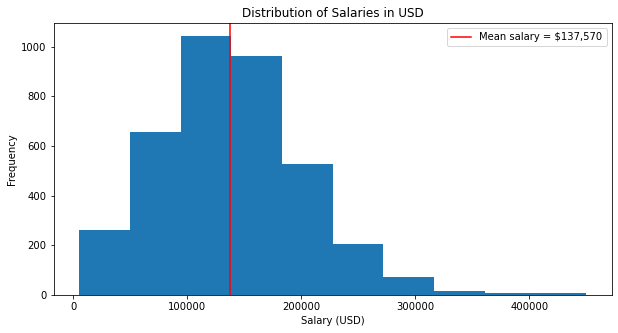

In [11]:
plot_salary_histogram(df)

### Distribution of Jobs By Experience Level

In [16]:
def experience_level_pie(df):
    exp_counts = df["experience_level"].value_counts()
    
    plt.pie(exp_counts.values, labels = exp_counts.index, autopct = '%1.1f%%')
    plt.show()

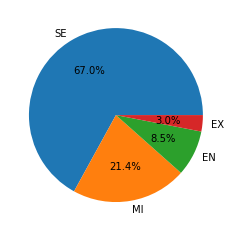

In [17]:
experience_level_pie(df)

In [18]:
df["job_title"].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

#### Group the job_titles into the following different Job_Types:
Data Scientist<br>
Machine Learning Engineering<br>
Data Analyst<br>
Data Engineer<br>
Data Architect<br>
Other<br>

In [19]:
JOB_TYPES = {
    "Machine Learning Engineer": ["machine learning", "autonomous", "ai", "mlops", "computer vision", "deep learning", "ml", "nlp", "research engineer"],
    "Data Scientist": ["science", "scientist"],
    "Data Architect": ["architect"],
    "Data Engineer": ["data engineer", "etl", "engineer"],
    "Data Analyst": ["analyst", "analytics", "bi", "business intelligence"],
}

In [20]:
def map_job_title(title):
    title = title.lower()
    for job_type, keywords in JOB_TYPES.items():
        if any(keyword in title for keyword in keywords):
            return job_type
    return "Other"

In [21]:
df["Job_Type"] = [map_job_title(title) for title in df["job_title"]]

### Countplot of Different Job Types

In [24]:
def countplot(data, column):
    plt.figure(figsize = (10, 5))
    sns.countplot(y = column, data = data, order = data[column].value_counts().index)
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.title("Count Plot of {}".format(column))
    plt.show()

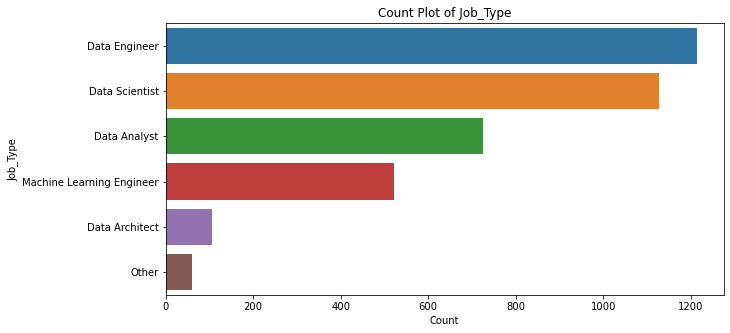

In [25]:
countplot(df, "Job_Type")

In [26]:
df.Job_Type.value_counts()

Data Engineer                1214
Data Scientist               1127
Data Analyst                  726
Machine Learning Engineer     522
Data Architect                105
Other                          61
Name: Job_Type, dtype: int64

### Demand for Different Job Types Throughout the Years

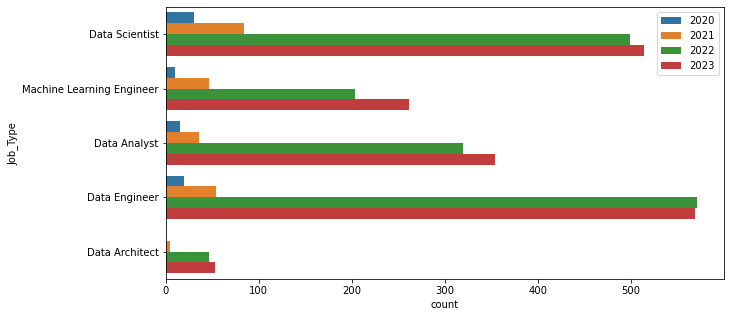

In [34]:
plt.figure(figsize = (10,5))

sns.countplot(data = df[df['Job_Type'] != "Other"], y = 'Job_Type', hue = 'work_year')
plt.legend(loc = 'upper right')
plt.show()

### Salary Distribution by Job Type

In [31]:
def plot_salary_histogram_by_job_type(df):
    fig, axs = plt.subplots(nrows = 2, ncols = len(df["Job_Type"].unique())//2, figsize=(20, 10))
    for i, job_type in enumerate(sorted(df["Job_Type"].unique())):
        df_new = df[df["Job_Type"] == job_type]
        mean_salary = df_new["salary_in_usd"].mean()
        axs[i//3][i%3].hist(df_new["salary_in_usd"])
        axs[i//3][i%3].axvline(mean_salary, color = 'red', label = f"Mean salary = ${mean_salary:,.0f}")
        axs[i//3][i%3].set_xlabel("Salary (USD)")
        axs[i//3][i%3].set_ylabel("Frequency")
        axs[i//3][i%3].set_title(job_type)
        axs[i//3][i%3].legend()
        
    fig.suptitle("Distribution of Salaries in USD for different Job Types")
    plt.tight_layout()
    plt.show()

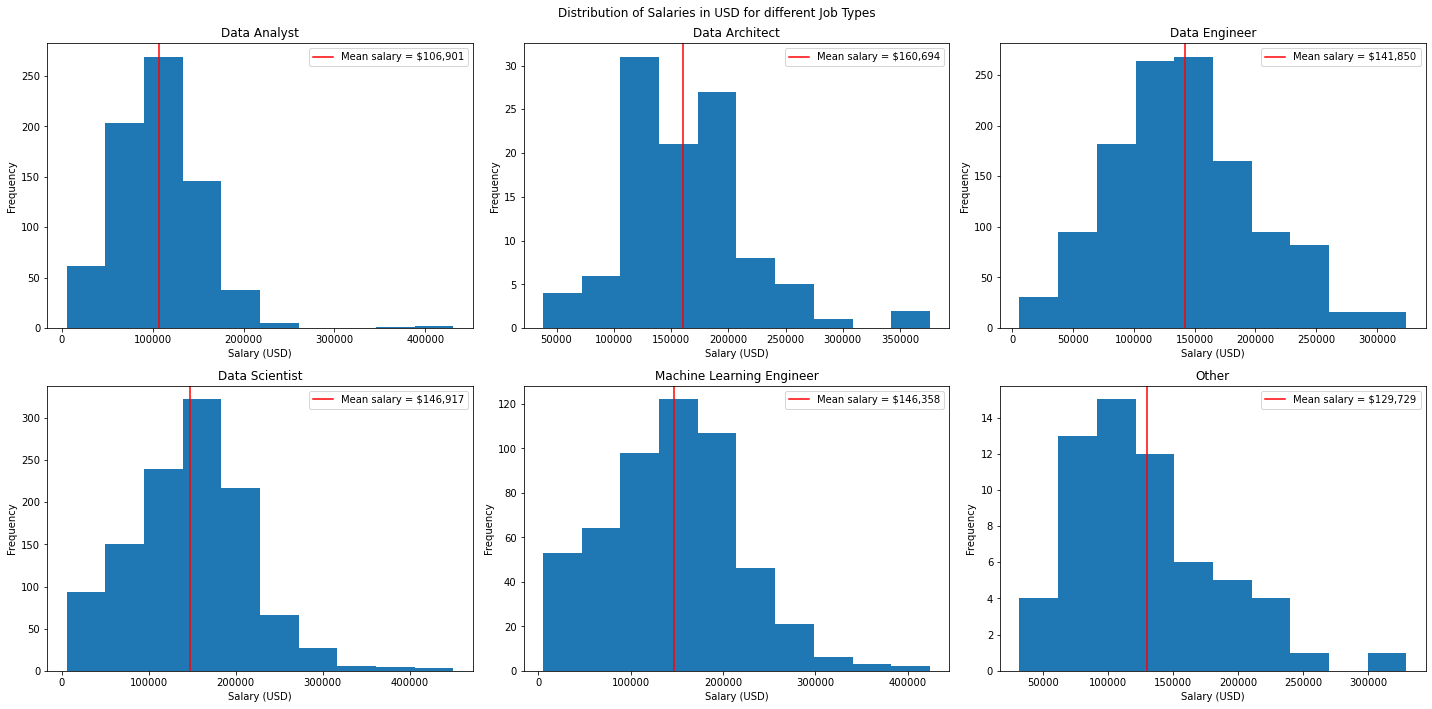

In [32]:
plot_salary_histogram_by_job_type(df)

# Q : What is the Salary from past 4 year, does it increaseing or decreaseing ?

In [14]:
def plot_salary_histogram_by_year(df):
    fig, axs = plt.subplots(ncols = len(df["work_year"].unique()), figsize = (15, 5))
    for i, year in enumerate(sorted(df["work_year"].unique())):
        df_new = df[df["work_year"] == year]
        mean_salary = df_new["salary_in_usd"].mean()
        axs[i].hist(df_new["salary_in_usd"])
        axs[i].axvline(mean_salary, color = 'red', label = f"Mean salary = ${mean_salary:,.0f}")
        axs[i].set_xlabel("Salary (USD)")
        axs[i].set_ylabel("Frequency")
        axs[i].set_title(year)
        axs[i].legend()
        
    fig.suptitle("Distribution of Salaries in USD")
    plt.tight_layout()
    plt.show()

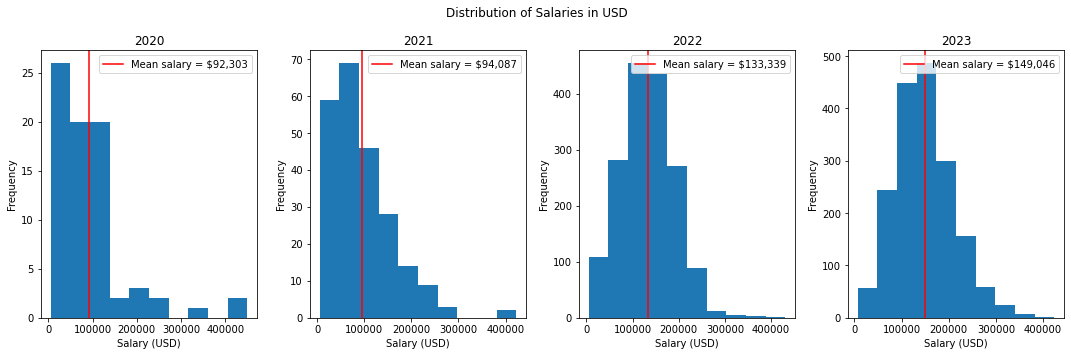

In [15]:
plot_salary_histogram_by_year(df)

As we can see, Salary for data science field is in increasing order as year increase  